<a href="https://colab.research.google.com/github/cruxcode/probabilistic_modeling/blob/master/lda_variational_em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.special import psi

In [0]:
from sklearn.decomposition import PCA

In [0]:
import matplotlib.pyplot as plt

![alt text](https://drive.google.com/uc?id=1BatirgM6DzscCOAL8_CAYUZ8hCAjV54d)

Plate notation for LDA

![alt text](https://drive.google.com/uc?id=1wjvfzN9KVAxLscqd8DHxKCyoVhuw3khG)

Plate notation for Variational Inference


<b>Variational EM</b> is composed of two steps:
<ul>
    <li>Variaitonal Inference or E-Step - Infer the posterior distribution of all latent variables.</li>
    <li>M - Step - Estimate the parameters by maximizing log likelihood of data given parameters.</li>
</ul>

<b>Variational Inference for LDA</b><br>
The family of distributions used for approximation is mean field approximation over cateforical distribution. The varitonal distribution is fully factorized over all documents. $\gamma$ and $\pi$ are the free variaitonal parameters for latent variable $\theta$ and $z$ respectively. In this step $\gamma$ and $\pi$ are computed using parameter $\phi$.

<b>EM Algorithm for LDA</b><br>
The variational parameters computed in variaitonal inference step/ E-step are used as posterior distribution over latent variabales to udpate paramters $\phi$.

In [0]:
class LDA:
    """
        LDA implements Variational EM for LDA
    """
    def __init__(self, K, V, alpha):
        """
            Args:
                K = Number of topics/components
                V = Vocabulary size
                alpha = int/numpy array
        """
        self.K, self.V = K, V
        # parameter phi
        self.phi = np.random.random((K, V))
        if type(alpha) == int:
            self.alpha = np.array([alpha]*K)
        self.alpha = alpha
        self.data = None
        
    def fit(self, data, n_iter=25):
        """
        Fits the LDA to data.
            Args:
                data = a 2D numpy matrix,
                with rows containing triplets
                doc_id, word_id, count
                n_iter = number of iterations
        """
        # Runs LDA for n_iter times over each document
        # in corpus of M
        self.data = data
        for i in range(n_iter):
            print("Iteration {0}".format(i+1))
            for _, d in enumerate(np.unique(self.data[:, 0])):
                w, c, pie, gamma = self.variaitonal_inference(d)
                self.phi = self.phi + self.m_step(w, c, pie)
            self.phi = self.phi / np.sum(self.phi, axis=1).reshape(self.K, 1)
        
        assert self.phi.shape == (self.K, self.V), ('phi shape mismatch')
        
        return self.phi
    
    def variaitonal_inference(self, d, burn_in=25):
        """
        Variaitonal Inference or the E-Step
            Args:
                d = document id
                burn_in = burn in period
            Returns:
                pie = 
        """
        # free variational parameters
        w = self.data[self.data[:, 0]==d, 1]
        c = self.data[self.data[:, 0]==d, 2]
        pie = np.random.random( (np.shape(w)[0], self.K) )
        pie = pie / np.sum(pie, axis=0)
        gamma = self.alpha + np.sum(pie, axis=0)
        
        # TODO: put a check for convergence instead of hard coded burn_in
        
        for _ in range(burn_in):
            pie = (self.phi[:, w]).T*np.exp(psi(gamma)-psi(np.sum(gamma)))
            pie = pie / np.sum(pie, axis=0)
            gamma = self.alpha + np.sum(pie*c.reshape(c.shape[0], 1), axis=0)
            
        assert pie.shape == (np.shape(w)[0], self.K), ('pie shape mismatch')
        assert gamma.shape == (self.K,), ('gamma shape mismatch')
        
        return w, c, pie, gamma
    
    def m_step(self, w, c, pie):
        phi_j = np.zeros((self.K, self.V))
        phi_j[:, w] = (pie*c.reshape(c.shape[0], 1)).T
        
        assert phi_j.shape == (self.K, self.V), ('phi shape mismatch')
        
        return phi_j

In [0]:
A = np.load('mat_A.npy')
B = np.load('mat_B.npy')

In [0]:
V = np.max(np.hstack((A[:,1],B[:,1]))) + 1   

In [0]:
mdl = LDA(20, V, 10)

In [0]:
mdl.fit(A)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25


array([[1.80128743e-93, 1.04954979e-84, 3.60398134e-93, ...,
        4.16271302e-93, 2.61519196e-89, 2.20246002e-94],
       [7.99651907e-94, 8.67264780e-85, 9.28807112e-94, ...,
        9.79684052e-94, 7.37594192e-89, 2.10256252e-93],
       [1.07690943e-93, 4.01235889e-85, 1.47373328e-93, ...,
        2.76692694e-93, 5.49011512e-89, 9.93713604e-94],
       ...,
       [3.66341768e-94, 1.21708201e-84, 1.77892750e-93, ...,
        7.78341161e-94, 1.70636336e-88, 2.89547561e-93],
       [1.41961338e-93, 1.38813990e-84, 3.94631873e-93, ...,
        6.08917773e-94, 2.73179474e-89, 7.68019463e-94],
       [1.25774628e-93, 6.29696574e-85, 5.01836479e-93, ...,
        1.35808730e-93, 8.94996889e-89, 2.93675856e-94]])

In [0]:
mdl_pca = PCA(2)
mdl_pca.fit(mdl.phi)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
tr = mdl_pca.transform(mdl.phi)

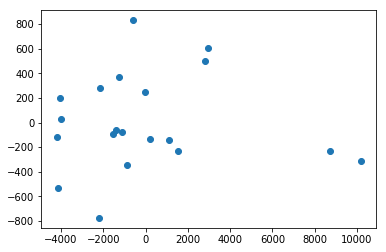

In [0]:
plt.scatter(tr[:, 0]*10e7, tr[:, 1]*10e7)